# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [12]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm


warnings.filterwarnings("ignore")

In [8]:
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})


Draw a dispersion diagram (scatter plot) for the data.

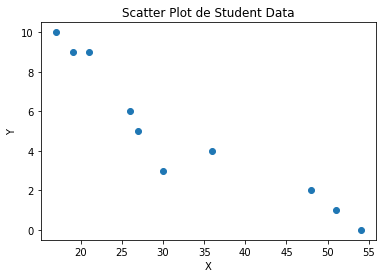

In [10]:
plt.scatter(student_data['X'], student_data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot de Student Data')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# La hipótesis sería que a más años más probable que lleguen tarde a clase

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
covariance = student_data['X'].cov(student_data['Y'])
correlation = student_data['X'].corr(student_data['Y'])

print('Covarianza:', covariance)
print('Correlación:', correlation)


Covarianza: -45.56666666666666
Correlación: -0.9391626886887122


In [ ]:
# Las variables están fuertemente relacionadas de forma inversa, es decir a cuanto mas aumenta x mas disminuye Y.
#La correlación es también mide la relación pero estando normalizada

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
X = sm.add_constant(student_data['X'])
y = student_data['Y']
model = sm.OLS(y, X).fit()


Plot your regression model on your scatter plot.

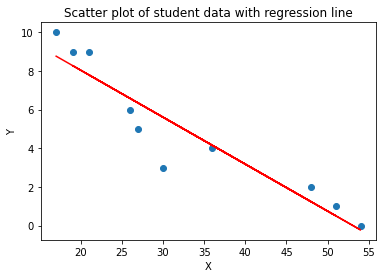

In [16]:
import matplotlib.pyplot as plt

# Crear el modelo de regresión
X = sm.add_constant(student_data['X'])
y = student_data['Y']
model = sm.OLS(y, X).fit()

# Graficar los datos y la línea de regresión
plt.scatter(student_data['X'], student_data['Y'])
plt.plot(student_data['X'], model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of student data with regression line')

plt.show()

In [28]:
model.predict(X)

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
dtype: float64

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
'''
Al graficar la línea de regresión, podemos visualizar que la pendiente de la línea de regresión es negativa, lo que significa que hay una relación inversa entre las variables X e Y.
A medida que los valores de X aumentan, los valores de Y disminuyen.

Observando la dispersión de los puntos en el scatter plot, podemos notar que algunos puntos están alejados de la línea de regresión. Esto sugiere que la relación entre las variables no es perfecta, y que existen otros factores que pueden estar afectando la variable Y.
Sin embargo, la línea de regresión todavía proporciona una buena aproximación para la relación entre X e Y.
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
df = pd.read_csv(r'../7.3-lab_regression_analysis/vehicles.csv')

In [26]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [27]:
# Calcular las correlaciones
correlations = df.corr()['CO2 Emission Grams/Mile']

# Imprimir las correlaciones
print(correlations)


Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the data into a pandas DataFrame
df = pd.read_csv('vehicles.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert categorical variables to numerical features using label encoding
label_encoder = LabelEncoder()
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Vehicle Class'] = label_encoder.fit_transform(df['Vehicle Class'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])

# Convert the 'Drive System' column to one-hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(df[['Drive System']])
drive_system_encoded = onehot_encoder.transform(df[['Drive System']]).toarray()
drive_system_labels = onehot_encoder.get_feature_names(['Drive System'])
drive_system_df = pd.DataFrame(data=drive_system_encoded, columns=drive_system_labels)
df = pd.concat([df, drive_system_df], axis=1)

X = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict CO2 emissions


KeyError: "None of [Index(['Drive System'], dtype='object')] are in the [columns]"

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 